## 부산대학교 SW 융합교육원 K-train AIP 과정

실습일자: 2025-07-14

작성자: 김태연

## 실습 문제: 최소-최대 정규화 (Min-Max Normalization)

**설명**: 최소-최대 정규화는 데이터의 모든 값을 0과 1 사이의 범위로 조정하는 표준화 기법입니다. 이 방법은 데이터의 최솟값을 0으로, 최댓값을 1로 변환하여 모든 데이터 포인트가 이 범위 내에 비례적으로 위치하도록 만듭니다. 이번 실습의 목표는 주어진 숫자 리스트에 최소-최대 정규화 공식을 적용하는 Python 함수를 작성하는 것입니다.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

**요구사항**:

  - 숫자 리스트를 인자로 받는 `min_max_normalize` 함수를 완성하세요.
  - 함수 내에서 리스트의 최솟값(`min`)과 최댓값(`max`)을 찾으세요.
  - 리스트의 각 숫자에 최소-최대 정규화 공식을 적용하여 새로운 리스트를 생성하고 반환하세요.
  - 주어진 샘플 데이터로 함수를 테스트하고 결과를 출력하여 확인하세요.



In [38]:
import numpy as np
import matplotlib.pyplot as plt

def min_max_normalize(data: list[float]) -> list[float]:
    m_max = np.max(data)
    m_min = np.min(data)
    return (data - m_min) / (m_max - m_min)


sample_data = np.array([10, 20, 50, 60, 80, 100])
normalized_data = min_max_normalize(sample_data)
print(f"Original Data: {sample_data}")
print(f"Normalized Data: {normalized_data}")





Original Data: [ 10  20  50  60  80 100]
Normalized Data: [0.         0.11111111 0.44444444 0.55555556 0.77777778 1.        ]


## 실습 문제: 표준화 (Z-score 정규화)

**설명**: 표준화(Standardization), 또는 Z-score 정규화는 데이터의 분포를 평균이 0이고 표준편차가 1이 되도록 변환하는 방법입니다. 이 변환을 통해 서로 다른 단위나 스케일을 가진 데이터를 비교할 수 있게 됩니다. 이번 실습에서는 주어진 숫자 리스트를 Z-score 정규화 공식을 사용하여 표준화하는 Python 함수를 `Numpy` 라이브러리를 이용해 작성합니다.

$$Z = \frac{X - \mu}{\sigma}$$

**요구사항**:

  - `Numpy` 배열을 인자로 받는 `standardize` 함수를 완성하세요.
  - 함수 내에서 `Numpy`를 사용하여 배열의 평균(`μ`)과 표준편차(`σ`)를 계산하세요.
  - 배열의 각 요소에 Z-score 공식을 적용하여 새로운 배열을 생성하고 반환하세요.
  - 주어진 샘플 데이터로 함수를 테스트하고, 변환된 데이터의 평균과 표준편차를 출력하여 결과가 0과 1에 가까운지 확인하세요.



Original Data: [ 10  20  50  60  80 100]
Standardized Data: [-1.37799724 -1.05999788 -0.10599979  0.21199958  0.8479983   1.48399703]
New Mean: -0.00
New Std Dev: 1.00


(array([1., 1., 0., 0., 1., 1., 0., 1., 0., 1.]),
 array([-1.37799724, -1.09179782, -0.80559839, -0.51939896, -0.23319953,
         0.05299989,  0.33919932,  0.62539875,  0.91159818,  1.1977976 ,
         1.48399703]),
 <BarContainer object of 10 artists>)

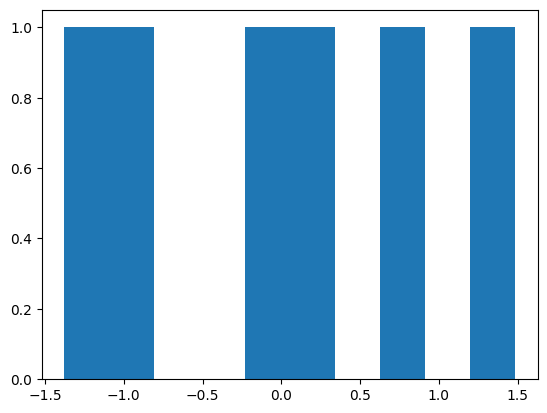

In [39]:

import numpy as np
import matplotlib.pyplot as plt

def standardize(data: np.ndarray) -> np.ndarray:
    """
    주어진 Numpy 배열을 Z-score 정규화를 사용하여 표준화합니다.
    """
    mean = np.mean(data)
    std = np.std(data)

    return  (data-mean)/std   


    pass


sample_data = np.array([10, 20, 50, 60, 80, 100])
standardized_data = standardize(sample_data)

print(f"Original Data: {sample_data}")
print(f"Standardized Data: {standardized_data}")
print(f"New Mean: {np.mean(standardized_data):.2f}")
print(f"New Std Dev: {np.std(standardized_data):.2f}")

plt.hist(standardized_data)

## 실습 문제: 훈련, 검증, 테스트 데이터셋 분할

**설명**:
머신러닝 모델을 개발할 때, 전체 데이터셋을 **훈련(Training)**, **검증(Validation)**, **테스트(Test)** 세트로 나누는 것은 매우 중요합니다. 모델은 **훈련 세트**로 학습하고, **검증 세트**를 사용해 모델의 성능을 조정(튜닝)하며, 마지막으로 **테스트 세트**를 통해 학습 과정에 사용되지 않은 새로운 데이터에 대한 최종 성능을 공정하게 평가합니다. 이번 실습에서는 `Numpy`를 사용하여 주어진 데이터셋을 훈련, 검증, 테스트 세트로 분할하는 함수를 만듭니다.


**요구사항**:

  - 먼저 `np.random.shuffle()`을 사용해 전체 데이터셋의 순서를 무작위로 섞어 데이터가 편향되지 않도록 합니다.
  - 데이터셋을 **8:1:1** 비율 (훈련 80%, 검증 10%, 테스트 10%)로 분할하세요. 전체 데이터의 개수를 기반으로 각 세트의 크기를 계산해야 합니다.
  - 계산된 크기에 맞게 `Numpy` 배열 슬라이싱을 사용하여 `train_set`, `val_set`, `test_set`을 생성하고 반환하세요.
  - 분할된 각 데이터셋의 크기(shape)를 출력하여 비율에 맞게 잘 나뉘었는지 확인합니다.



In [ ]:
X = np.random.randn(150, 4)


s1 = int(len(X)*(80/100))
s2 =  int(len(X)*(10/100))
s3 = s2 + int(len(X)*(10/100))

s2

15

In [ ]:
import numpy as np

def split_dataset(data: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    s1 = int(len(X)*(80/100))
    s2 = s1 + int(len(X)*(10/100))

    fidx = data[:s1],data[s1:s2], data[s2:len(data)]
    


    return s2,len(data)
    # 1. 데이터를 무작위로 섞습니다.
    # 2. 데이터셋 크기를 계산합니다.
    # 3. 데이터를 슬라이싱하여 세트를 나눕니다.




X = np.random.randn(150, 4)
val = split_dataset(X)

val

(136, 150)

In [ ]:

import numpy as np

def split_dataset(data: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    
    np.random.shuffle(data)
    
    s1 = int(len(X)*(80/100))
    s2 = s1 + int(len(X)*(10/100))

    fidx = data[:s1],data[s1:s2], data[s2:]
    


    return fidx
    # 1. 데이터를 무작위로 섞습니다.
    # 2. 데이터셋 크기를 계산합니다.
    # 3. 데이터를 슬라이싱하여 세트를 나눕니다.




X = np.random.randn(150, 4)
train, val, test = split_dataset(X)

print(f"Original data shape: {X.shape}")
print(f"Training set shape: {train.shape}")
print(f"Validation set shape: {val.shape}")
print(f"Test set shape: {test.shape}")

Original data shape: (150, 4)
Training set shape: (120, 4)
Validation set shape: (15, 4)
Test set shape: (15, 4)
